In [ ]:
import pandas as pd
import numpy as np
from scipy import stats


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
data = {'Student name':['Ram','Ganesh','Anand','Mukesh','Shankar','Chinmay','Aman'],
       'GMAT Score':[750,720,710,690,670,650,600],
       'Work Exp':[0,1,2,0,4,6,1],
       'International Awards':[4,2,0,1,2,2,0],
       'Admission':["Yes","Yes","No","No","Yes","Yes","No"]}


df = pd.DataFrame(data,index=None)
df = df.set_index("Student name")
df

,GMAT Score,Work Exp,International Awards,Admission
Student name,,,,
Ram,750,0,4,Yes
Ganesh,720,1,2,Yes
Anand,710,2,0,No
Mukesh,690,0,1,No
Shankar,670,4,2,Yes
Chinmay,650,6,2,Yes
Aman,600,1,0,No


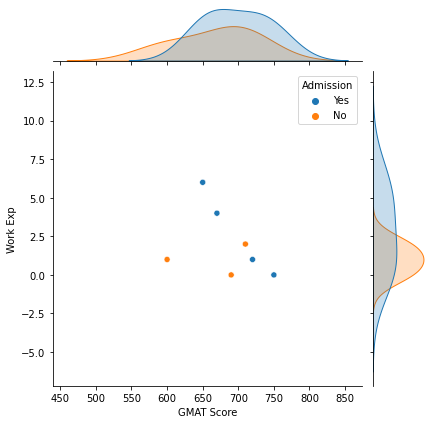

In [ ]:
sns.jointplot(x="GMAT Score", y="Work Exp", data=df, hue="Admission")

In [ ]:
data = {'Student name':['Amit'],
        "GMAT Score":[700],
        'Work Exp':[1],
        'International Awards':[2]}
query_data = pd.DataFrame(data)
query_data = query_data.set_index("Student name")
query_data

,GMAT Score,Work Exp,International Awards
Student name,,,
Amit,700,1,2


## Converting data into numpy array

In [ ]:
query_data_numpy = np.array(query_data)
query_data_numpy

array([[700,   1,   2]], dtype=int64)

In [ ]:
training_data_input = np.array(df.iloc[: , :-1])
training_data_input

array([[750,   0,   4],
       [720,   1,   2],
       [710,   2,   0],
       [690,   0,   1],
       [670,   4,   2],
       [650,   6,   2],
       [600,   1,   0]], dtype=int64)

In [ ]:
training_data_output = np.array(df.iloc[: , -1:])
training_data_output

array([['Yes'],
       ['Yes'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No']], dtype=object)

In [ ]:
distances = np.sqrt(np.sum(np.square(query_data_numpy - training_data_input), axis=1))

In [ ]:
distances

array([ 50.04997502,  20.        ,  10.24695077,  10.09950494,
        30.14962686,  50.24937811, 100.019998  ])

In [ ]:
sort_index = np.argsort(distances)
sort_index

array([3, 2, 1, 4, 0, 5, 6], dtype=int32)

# Q1:What is the distance between Amit and Ram

## As Ram is at the 0th index which means the distance between Amit and Ram is : 50.04997502

# Q2:Who are the top 3 neighbors to querypoint Amit?

In [ ]:
top_three = sort_index[:3]
top_three

array([3, 2, 1], dtype=int32)

## As we can see data at index 3, 2 and 1 are the top 3 closest data points to Amit.
## 3 is Mukesh
## 2 is Anand
## 1 is Ganesh

# Q3:If k=5, will Amit can get admission?

In [ ]:
top_five = sort_index[:5]
nn_classes = training_data_output[top_five]
pred = stats.mode(nn_classes)[0][0][0]
pred

'Yes'